In [114]:
from PIL import Image, ImageOps
img = Image.open('Untitled.png')


centerSize = 300

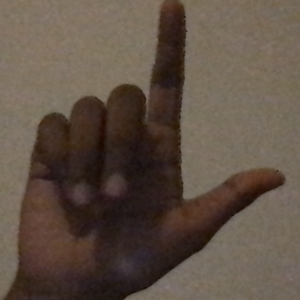

In [115]:
width, height = img.size   # Get dimensions
new_width = 300
new_height = 300

left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
img = img.crop((left, top, right, bottom))

img

In [116]:
im_small = img.resize((28, 28))
im_small



In [117]:
im_grey = im_small.convert('L')
im_grey


In [118]:
from torchvision import transforms
from torch import FloatTensor
import torch.nn.functional as F
transform = transforms.Compose([transforms.PILToTensor()])
im_tensor = transform(im_grey).type(FloatTensor).unsqueeze(0)
mean: float =0.485 * 255
std: float =0.229 * 255
transform = transforms.Normalize(mean = [mean], std = [std])
im_tensor = 0.9 - ((im_tensor) / 255)
im_tensor


tensor([[[[0.4412, 0.4451, 0.4451, 0.4333, 0.4373, 0.4412, 0.4373, 0.4373,
           0.4412, 0.4412, 0.4373, 0.4490, 0.4451, 0.4451, 0.4569, 0.6176,
           0.6686, 0.5039, 0.4569, 0.4608, 0.4647, 0.4647, 0.4686, 0.4765,
           0.4765, 0.4882, 0.4804, 0.4882],
          [0.4412, 0.4373, 0.4373, 0.4412, 0.4333, 0.4373, 0.4333, 0.4333,
           0.4373, 0.4333, 0.4373, 0.4412, 0.4451, 0.4412, 0.4882, 0.6922,
           0.7510, 0.5510, 0.4451, 0.4569, 0.4647, 0.4686, 0.4647, 0.4725,
           0.4765, 0.4804, 0.4843, 0.4961],
          [0.4373, 0.4373, 0.4373, 0.4373, 0.4373, 0.4373, 0.4333, 0.4373,
           0.4373, 0.4412, 0.4373, 0.4412, 0.4451, 0.4373, 0.5157, 0.7353,
           0.7784, 0.5627, 0.4490, 0.4686, 0.4647, 0.4647, 0.4686, 0.4765,
           0.4804, 0.4725, 0.4843, 0.4882],
          [0.4412, 0.4373, 0.4373, 0.4333, 0.4333, 0.4412, 0.4333, 0.4294,
           0.4373, 0.4412, 0.4412, 0.4412, 0.4451, 0.4294, 0.5275, 0.7588,
           0.7863, 0.5588, 0.4451, 0.4647, 

In [119]:
transform = transforms.Compose([transforms.ToPILImage()])
img = transform(im_tensor.reshape(1,28,28))
img

In [120]:
import onnx
import onnxruntime as ort

import torch.nn as nn



fname = "asl_model.onnx"
# check exported model
model = onnx.load(fname)
onnx.checker.check_model(model)  # check model is well-formed

# create runnable session with exported model
ort_session = ort.InferenceSession(fname)
net = lambda inp: ort_session.run(None, {'input': inp.data.numpy()})[0]

sig = nn.Sigmoid()
labels = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(labels[net(im_tensor).argmax()])

T
